In [35]:
# Analysis of the Raw Data 

import pandas as pd 
import numpy as np

In [36]:
raw_data = pd.read_csv('../Data/ProSeq_raw.csv')

raw_data.head()

,GeneID,Ensembl_ID,CPM_TUMOR,CPM_SPLEEN,ProSeq,Chr
0,DPM1,ENSG00000000419,61.274627,47.583513,AAGCTGCACAGTCGAGCCTGCGGCTCCGCAGCCGAATAGAGCGGAA...,20
1,SCYL3,ENSG00000000457,21.703534,31.948930,GGGGGCAAAACTACTGCATTAATATTAAAATTTTCAAATATTACTT...,1
2,FGR,ENSG00000000938,3.634080,75.151739,ATTACAGGCTGAGCCACTGCCCCCAGCCAGTTACTCAGTTTTTCTA...,1
3,CFH,ENSG00000000971,1.312307,8.308232,TCCAGCATATGATTTATGTTTTCCTTATACATATTACACTACAATA...,1
4,FUCA2,ENSG00000001036,37.855000,31.797871,TCCCAAAGTGTTGGGATTACAGGAGTGAGCCACCGCGCCCGGCCCA...,6


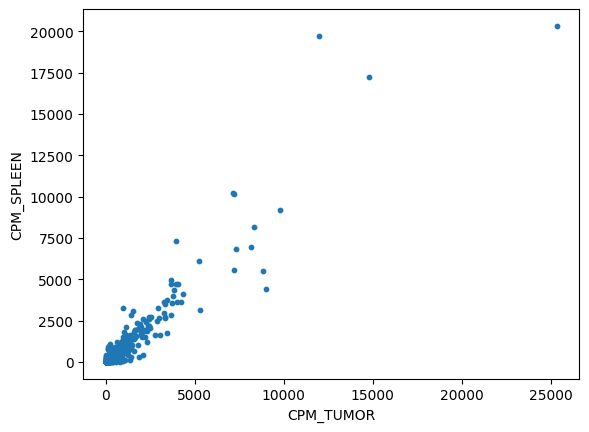

In [37]:
# From memory CPM_TUMOR and CPM_SPLEEN cannot really be compared against each other -> but interesting to see distribution of both

# plot distribution of CPM_TUMOR and CPM_SPLEEN

import pandas as pd
import matplotlib.pyplot as plt

# plot scatter plot of CPM_TUMOR and CPM_SPLEEN with smaller dots
plt.scatter(raw_data['CPM_TUMOR'], raw_data['CPM_SPLEEN'], s=10)
plt.xlabel('CPM_TUMOR')
plt.ylabel('CPM_SPLEEN')
plt.show()



In [39]:
# ok so it seems like we have data that is higly correlated with each other
# would if we looked at CPM_TUMOR / CPM_SPLEEN


# plot distribution
raw_data['CPM_TUMOR/CPM_SPLEEN'] = raw_data['CPM_TUMOR'] / raw_data['CPM_SPLEEN']

# remove values where CPM_TUMOR or CPM_SPLEEN is 0
raw_data = raw_data[raw_data['CPM_TUMOR'] != 0]
raw_data = raw_data[raw_data['CPM_SPLEEN'] != 0]

# remove values where CPM_TUMOR/CPM_SPLEEN is 0
raw_data = raw_data[raw_data['CPM_TUMOR/CPM_SPLEEN'] != 0]

# key metrics of the data
raw_data['CPM_TUMOR/CPM_SPLEEN'].describe()


count    9495.000000
mean        1.633058
std        10.114067
min         0.012851
25%         0.708507
50%         0.896256
75%         1.236260
max       735.086977
Name: CPM_TUMOR/CPM_SPLEEN, dtype: float64

In [40]:
# remove outliers of CPM_TUMOR and CPM_SPLEEN
# Define outliers as values outside 1.5*IQR for CPM_TUMOR/CPM_SPLEEN
q1 = raw_data['CPM_TUMOR/CPM_SPLEEN'].quantile(0.25)
q3 = raw_data['CPM_TUMOR/CPM_SPLEEN'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
filtered_data = raw_data[
    (raw_data['CPM_TUMOR/CPM_SPLEEN'] >= lower_bound) &
    (raw_data['CPM_TUMOR/CPM_SPLEEN'] <= upper_bound)
]

# Optionally, show how many rows were removed
print(f"Removed {len(raw_data) - len(filtered_data)} outliers from CPM_TUMOR/CPM_SPLEEN ratio.")


Removed 756 outliers from CPM_TUMOR/CPM_SPLEEN ratio.


<Axes: xlabel='CPM_TUMOR/CPM_SPLEEN', ylabel='Count'>

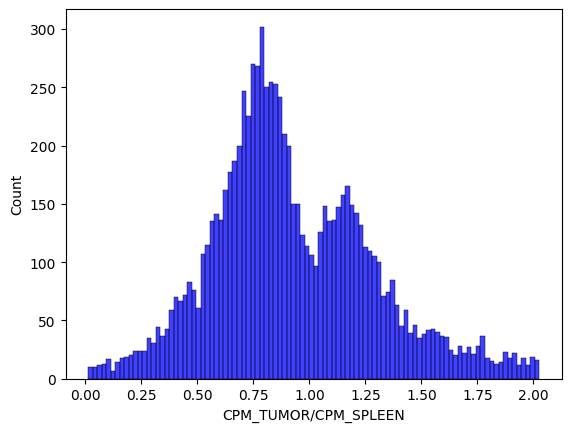

In [43]:
# visualise the data 

# Alternate histogram using seaborn
import seaborn as sns

sns.histplot(filtered_data['CPM_TUMOR/CPM_SPLEEN'], bins=100, kde=False, color='blue')


In [46]:
# seems to be bimodal dsitribution
# maybe can do prelim analysis on this data 

# what is the dimension of the data
print(filtered_data.shape)

# what is the distribution of the data
print(filtered_data.describe())


# save it as a csv
filtered_data.to_csv('../Processed-Data/ProSeq_raw_filtered.csv', index=False)

# i assume proseq and chr will form the predictors for cpm_tumor/cpm_spleen


(8739, 7)
          CPM_TUMOR    CPM_SPLEEN  CPM_TUMOR/CPM_SPLEEN
count   8739.000000   8739.000000           8739.000000
mean     102.555889    107.678483              0.924839
std      493.687545    508.179008              0.362701
min        0.100947      0.679764              0.012851
25%       10.801293     13.142113              0.690545
50%       30.990627     35.498811              0.862775
75%       75.154794     83.762088              1.159124
max    25322.572550  20325.033160              2.025666


In [ ]:
# save the four components of the data 
